# Heat-exchanger data analysis

## Cristian Merli - UniTn id: 211384

### Software header (info)

### Useful links

https://code.visualstudio.com/docs/datascience/data-science-tutorial

In [1910]:
__author__ = "Cristian Merli"
__copyright__ = "Copyright 2021, The Cogent Project"
__credits__ = ["Cristian Merli", "Ing. Maurizio Grigiante"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Cristian Merli"
__email__ = "cristian.merli@studenti.unitn.it"
__status__ = "Draft"

### Libraries import

In [1911]:
import fileinput as fi                                                                                  # File management lib
import pandas as pd                                                                                     # Data-analysis panda lib
import numpy as np                                                                                      # Data-analysis numpy lib
import seaborn as sns                                                                                   # Seaborn plottin' lib
import matplotlib.pyplot as plt                                                                         # Math plottin' lib

### Dataset vars

* Dataset file: original (.dat) file and formatted (.csv) file

In [1912]:
dat_data_filepath = "../dataset/scambiatore26112021_5.dat"                                              # Original dataset filepath (.dat)
csv_data_filepath = "../dataset/scambiatore26112021_5.csv"                                              # Formatted dataset filepath (generate new .csv file)

* Modifications to perform while converting and formatting (.dat) file into (.csv) file

In [1913]:
old_sep_chr = '\t'                                                                                      # Sep chr in (.dat) file
new_sep_chr = ';'                                                                                       # Sep chr in (.csv) file
comments_str = "% "                                                                                     # Delete comment-strings in (.dat) file when creatin' (.csv) file
oth_op_old_lbl = "Altra operazione"                                                                     # Replace 'other oper' lbl

* Heat-exchanger operation labels

In [1914]:
oth_op_lbl = "Altra-operazione"                                                                         # Other oper lbl
cocurrent_flow_lbl = "Equicorrente"                                                                     # Cocurrent flow lbl
countercurrent_flow_lbl = "Controcorrente"                                                              # Countercurrent flow lbl

* Dataset columns

In [1915]:
time_col = "Time(s)"                                                                                    # Time col in dataset (time ellapsed vals [s])
f1_col = "F1(l/h)"                                                                                      # Volume flow rate 1 col in dataset (cold fluid volume flow rate vals [l/h])
f2_col = "F2(l/h)"                                                                                      # Volume flow rate 2 col in dataset (hot fluid volume flow rate vals [l/h])
t1_col = "T1(degC)"                                                                                     # Temp 1 col in dataset (cold-in fluid temp vals [°C])
t2_col = "T2(degC)"                                                                                     # Temp 2 col in dataset (hot-in fluid temp vals [°C])
t3_col = "T3(degC)"                                                                                     # Temp 3 col in dataset (cold-out fluid temp vals [°C])
t4_col = "T4(degC)"                                                                                     # Temp 4 col in dataset (hot-out fluid temp vals [°C])
conf_col = "Configurazione"                                                                             # Config col in dataset

### Plotting vars

* Plotting labels

In [1916]:
plt_time_lbl = "Time [s]"                                                                               # X-axis lbl
plt_temp_flow_lbl = "Temperatures [°C]   /   Volume flow rates [l/h]"                                   # Y-axis lbl
plt_f1_lbl = "F1 - Cold fluid volume flow rate [l/h]"                                                   # Cold fluid vol flow rate (F1) lbl
plt_f2_lbl = "F2 - Hot fluid volume flow rate [l/h]"                                                    # Hot fluid vol flow rate (F2) lbl
plt_t1_lbl = "T1 - Cold-in fluid temperature [°C]"                                                      # Cold-in fluid temp (T1) lbl
plt_t2_lbl = "T2 - Hot-in fluid temperature [°C]"                                                       # Hot-in fluid temp (T2) lbl
plt_t3_lbl = "T3 - Cold-out fluid temperature [°C]"                                                     # Cold-out fluid temp (T3) lbl
plt_t4_lbl = "T4 - Hot-out fluid temperature [°C]"                                                      # Hot-out fluid temp (T4) lbl

### Dataset formatting, import and plot

* Convert and format dataset: open and manipulate data in (.dat) file, writing formatted data inside (.csv) file

In [1917]:
with open(dat_data_filepath,'r') as src_fl:                                                             # Open src file in read mode: (.dat) file
  with open(csv_data_filepath,'w') as dest_fl:                                                          # Open dest file in write mode: (.csv) file
      next(src_fl)                                                                                      # Skip header line in src file
      for line in src_fl:                                                                               # Read src file line-by-line
          line = line.replace(oth_op_old_lbl, oth_op_lbl)                                               # Replace target string (other operation label)
          line = line.replace(old_sep_chr, new_sep_chr)                                                 # Replace data separator-chars
          line = line.replace(comments_str, '')                                                         # Delete target string (comment string in src file)
          dest_fl.write(line)                                                                           # Write each formatted data line inside dest file (.csv)

* Import dataset data from formatted (.csv) file, creating a 'DataFrame' variable

In [1918]:
he_data = pd.read_csv(csv_data_filepath, sep=new_sep_chr, encoding='utf8')                              # Import data in (.csv) dataset and create a new panda (lib) DataFrame variable: 'he_data'

* Plot data in DataFrame 'he_data' variable: temperatures and volume flow rates, taken during LabView data-acquisition on heat-exchanger

<Figure size 1872x1008 with 0 Axes>

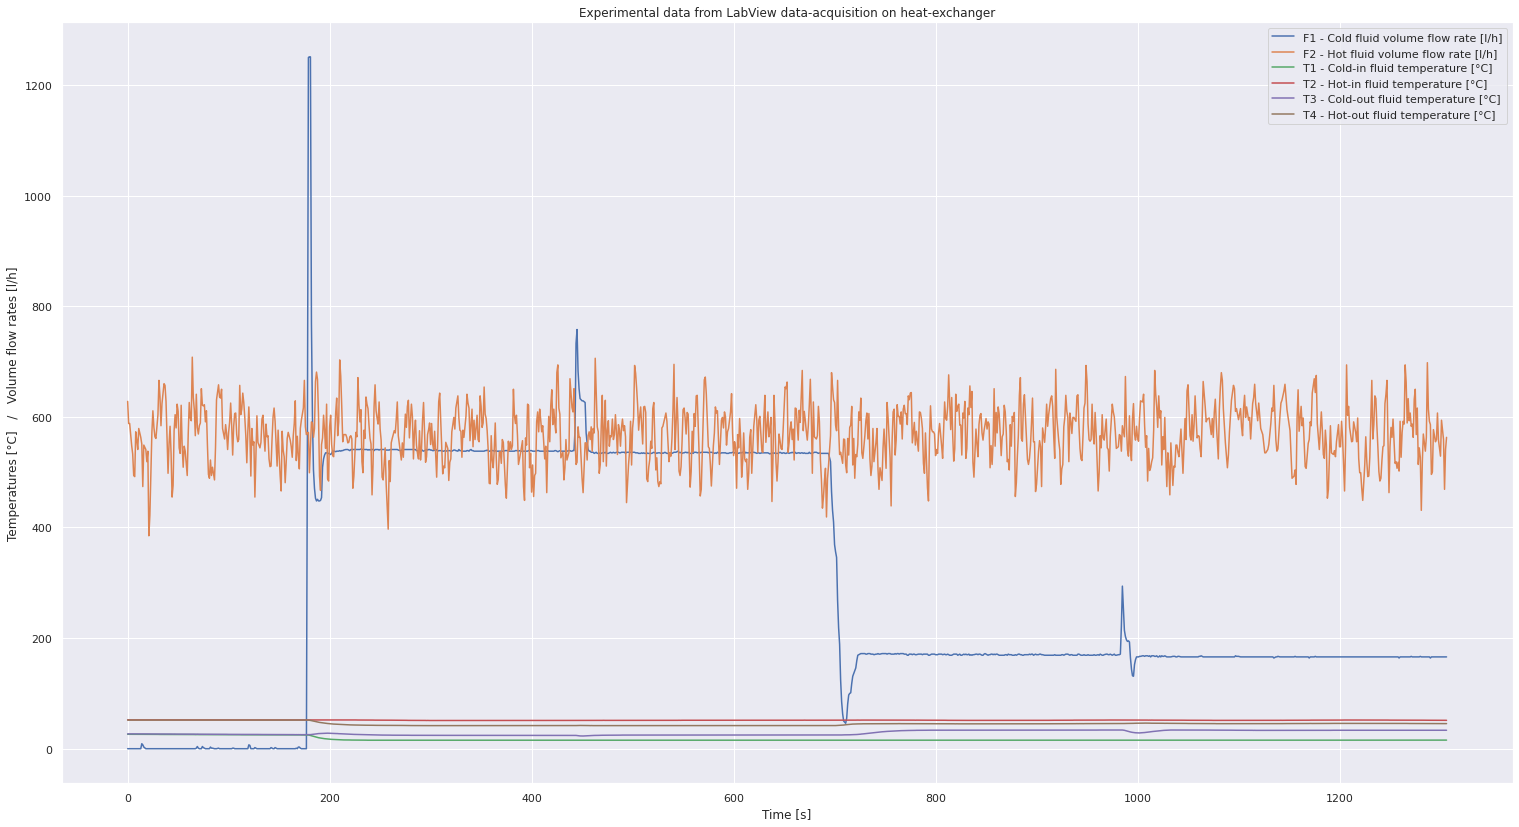

<Figure size 1872x1008 with 0 Axes>

In [1919]:
plt.title("Experimental data from LabView data-acquisition on heat-exchanger")                          # Plot title
plt.xlabel(plt_time_lbl)                                                                                # X-axis lbl
plt.ylabel(plt_temp_flow_lbl)                                                                           # Y-axis lbl
sns.set(rc={"figure.figsize":(26,14)})                                                                  # Plottin' size
sns.lineplot(x=time_col, y=f1_col, data=he_data, label=plt_f1_lbl)                                      # Plot cold fluid vol flow rate (F1)
sns.lineplot(x=time_col, y=f2_col, data=he_data, label=plt_f2_lbl)                                      # Plot hot fluid vol flow rate (F2)
sns.lineplot(x=time_col, y=t1_col, data=he_data, label=plt_t1_lbl)                                      # Plot cold-in fluid temp (T1)
sns.lineplot(x=time_col, y=t2_col, data=he_data, label=plt_t2_lbl)                                      # Plot hot-in fluid temp (T2)
sns.lineplot(x=time_col, y=t3_col, data=he_data, label=plt_t3_lbl)                                      # Plot cold-out fluid temp (T3)
sns.lineplot(x=time_col, y=t4_col, data=he_data, label=plt_t4_lbl);                                     # Plot hot-out fluid temp (T4)
plt.figure()                                                                                            # Plot figure

### Data extraction and filtering

* Data intervals detection: extract data in different operating conditions

In [1920]:
delim_idxs = [0] * 8                                                                                    # Delimiter-indexes array (array containing 8 dataframe row idxs - configurations start/end idxs)
arr_cell_ptr = 0                                                                                        # Delimiter-indexes array cells pointer (to access array cells vals)
rows_scroll_index = 0                                                                                   # Index to trace current row in dataframe rows scrolling cycle
old_oper_str = ""                                                                                       # Operation string in previous dataframe row
oper_str = ""                                                                                           # Operation string in current dataframe row

for rows_scroll_index, row in he_data.iterrows():                                                       # Cycle to scroll rows in dataframe, tracing row index
    old_oper_str = oper_str                                                                             # Update previous dataframe row string
    oper_str = row[conf_col]                                                                            # Update current dataframe row string
    if (rows_scroll_index > 1):                                                                         # Skip first row (previous and current dataframe row strings are initialized with the same val)
        if ((old_oper_str == oth_op_lbl) & (oper_str == cocurrent_flow_lbl)):                           # Cocurrent flow configuration start detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == cocurrent_flow_lbl) & (oper_str == oth_op_lbl)):                           # Cocurrent flow configuration end detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index (+1 for data split) in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == oth_op_lbl) & (oper_str == countercurrent_flow_lbl)):                      # Countercurrent flow configuration start detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
        if ((old_oper_str == countercurrent_flow_lbl) & (oper_str == oth_op_lbl)):                      # Countercurrent flow configuration end detecting condition
            delim_idxs[arr_cell_ptr] = rows_scroll_index                                                # Insert current row index (+1 for data split) in delimiter-indexes array
            arr_cell_ptr += 1                                                                           # Update delimiter-indexes array cells pointer val
if (delim_idxs[7] == 0):                                                                                # In case last configuration lasts 'till dataframe tail row
    delim_idxs[7] = rows_scroll_index+1                                                                 # Set last configuration end idx as tail row idx inside delimiter-idxs array (+1 for data split)

he_data_cocurr1 = he_data[delim_idxs[0]:delim_idxs[1]]                                                  # Extract cocurrent measure 1 (btwn 1st and 2nd index in delimiter-indexes array)
he_data_countercurr1 = he_data[delim_idxs[2]:delim_idxs[3]]                                             # Extract countercurrent measure 1 (btwn 3rd and 4th index in delimiter-indexes array)
he_data_countercurr2 = he_data[delim_idxs[4]:delim_idxs[5]]                                             # Extract countercurrent measure 2 (btwn 5th and 6th index in delimiter-indexes array)
he_data_cocurr2 = he_data[delim_idxs[6]:delim_idxs[7]]                                                  # Extract cocurrent measure 2 (btwn 6th and 7th index in delimiter-indexes array)

* Data intervals cleaning: exclude eventual values with 'other-operation' label

In [1921]:
he_data_cocurr1 = he_data_cocurr1[~he_data_cocurr1[conf_col].isin([oth_op_lbl])]                        # Remove eventual data corresponding to other-operation in heat-exchanger data cocurrent 1
he_data_countercurr1 = he_data_countercurr1[~he_data_countercurr1[conf_col].isin([oth_op_lbl])]         # Remove eventual data corresponding to other-operation in heat-exchanger data countercurrent 1
he_data_countercurr2 = he_data_countercurr2[~he_data_countercurr2[conf_col].isin([oth_op_lbl])]         # Remove eventual data corresponding to other-operation in heat-exchanger data countercurrent 1
he_data_cocurr2 = he_data_cocurr2[~he_data_cocurr2[conf_col].isin([oth_op_lbl])]                        # Remove eventual data corresponding to other-operation in heat-exchanger data cocurrent 2

* Function definition to find min value index in vals list (non-zero idx)

In [1922]:
def find_min_idx(vals):                                                                                 # find_min_idx(Vals list)
  min_idx = 0                                                                                           # Min val index init
  for i in range(len(vals)):                                                                            # Vals scrollin' cycle
    if (vals[i] < vals[min_idx]):                                                                       # Min val idx upd cond
      min_idx = i                                                                                       # Min val idx upd oper
  return min_idx                                                                                        # Rerturn min val idx in vals list (non-zero idx)

* Function definition to graphically plot data filtering operations

In [1923]:
def plot_data_flt(db, call_str, start_idxs_dbs, end_idxs_dbs, min_stddevs_dbs_idx):                     # plot_data_flt(Datablock to split, Datablocks start idxs, Datablocks end idxs, Function call string)
  dbs_w = 2                                                                                             # Datablocks lines width
  dbs_sel_w = 10                                                                                        # Selected datablocks lines width
  dbs_c = 'k'                                                                                           # Datablocks lines colors
  dbs_sel_c = 'g'                                                                                       # Selected datablocks lines colors
  plt.title(call_str)                                                                                   # Plot title
  plt.xlabel(plt_time_lbl)                                                                              # X-axis lbl
  plt.ylabel(plt_temp_flow_lbl)                                                                         # Y-axis lbl
  sns.set(rc={"figure.figsize":(26,14)})                                                                # Plottin' size
  sns.lineplot(x=time_col, y=f1_col, data=db, label=plt_f1_lbl)                                         # Plot cold fluid vol flow rate (F1)
  sns.lineplot(x=time_col, y=f2_col, data=db, label=plt_f2_lbl)                                         # Plot hot fluid vol flow rate (F2)
  sns.lineplot(x=time_col, y=t1_col, data=db, label=plt_t1_lbl)                                         # Plot cold-in fluid temp (T1)
  sns.lineplot(x=time_col, y=t2_col, data=db, label=plt_t2_lbl)                                         # Plot hot-in fluid temp (T2)
  sns.lineplot(x=time_col, y=t3_col, data=db, label=plt_t3_lbl)                                         # Plot cold-out fluid temp (T3)
  sns.lineplot(x=time_col, y=t4_col, data=db, label=plt_t4_lbl);                                        # Plot hot-out fluid temp (T4)
  plt.axvline(db[time_col].values[start_idxs_dbs[0]]-1, linewidth=dbs_w, color=dbs_c)                   # -
  for s_idx in start_idxs_dbs:                                                                          # -
    if (s_idx == start_idxs_dbs[min_stddevs_dbs_idx]):                                                  # -
      plt.axvline(db[time_col].values[s_idx], linewidth=dbs_sel_w, color=dbs_sel_c)                     # -
    else:                                                                                               # -
      plt.axvline(db[time_col].values[s_idx], linewidth=dbs_w, color=dbs_c)                             # -
  for e_idx in end_idxs_dbs:                                                                            # -
    if (e_idx == end_idxs_dbs[min_stddevs_dbs_idx]):                                                    # -
      plt.axvline(db[time_col].values[e_idx-1], linewidth=dbs_sel_w, color=dbs_sel_c)                   # -
    else:                                                                                               # -
      plt.axvline(db[time_col].values[e_idx-1], linewidth=dbs_w, color=dbs_c)                           # -
  plt.axvline(db[time_col].values[e_idx-1]+1, linewidth=dbs_w, color=dbs_c)                             # -
  plt.figure()                                                                                          # Plot figure

* Function definition to find optimal steady conditions data window, by calulating mean standard-deviations in datablocks

In [1924]:
def find_stdy_cond(db, dbs_span, dbg_flg, call_str):                                                    # find_stdy_cond(Datablock to split, Datablocks span [samples], Debug flag, Function call string)
  if (dbg_flg):                                                                                         # If dbg flg is ena
    print("\n-------------------------------------------------------------")                            # Print dbg fbk
    print("--> NEW 'find_stdy_cond()' FUNCTION CALL FOR", call_str)                                     # Print dbg fbk
    print("-------------------------------------------------------------\n")                            # Print dbg fbk
  dbs = list()                                                                                          # Datablocks list
  stddevs_dbs = list()                                                                                  # Datablocks mean standard deviations list to detect the smallest one
  start_idxs_dbs = list()                                                                               # Datablocks starting-idxs (by datablocks span [samples])
  end_idxs_dbs = list()                                                                                 # Datablocks ending-idxs (by datablocks span [samples])
  num_datablocks = len(db) // dbs_span                                                                  # Datablocks list size (zero-idx)
  max_idx = db.index[-1]-db.index[0]                                                                    # Max datablock dataframe idx
  for i in range(num_datablocks, 0, -1):                                                                # Cycle to scroll datablocks backwards, excluding the first incomplete set (tail-transitory)
    start_idxs_dbs.append(max_idx-((i-1)*dbs_span)-dbs_span+1)                                          # Datablocks starting-idx (by datablocks span [samples])
    end_idxs_dbs.append(max_idx-((i-1)*dbs_span)+1)                                                     # Datablocks ending-idx (by datablocks span [samples])
    dbs.append(db[start_idxs_dbs[-1]:end_idxs_dbs[-1]])                                                 # Populate datablocks list
    f1_stddev = dbs[-1][f1_col].std()                                                                   # Calc f1 data standard-deviation
    f2_stddev = dbs[-1][f2_col].std()                                                                   # Calc f2 data standard-deviation
    t1_stddev = dbs[-1][t1_col].std()                                                                   # Calc t1 data standard-deviation
    t2_stddev = dbs[-1][t2_col].std()                                                                   # Calc t2 data standard-deviation
    t3_stddev = dbs[-1][t3_col].std()                                                                   # Calc t3 data standard-deviation
    t4_stddev = dbs[-1][t4_col].std()                                                                   # Calc t4 data standard-deviation
    stddevs_dbs.append((f1_stddev+f2_stddev+t1_stddev+t2_stddev+t3_stddev+t4_stddev) / 6)               # Calc the data mean standard deviations, to look for the best data window (steady cond)
    if (dbg_flg):                                                                                       # If dbg flg is ena
      print("f1_stddev: ", f1_stddev)                                                                   # Print dbg fbk
      print("f2_stddev: ", f2_stddev)                                                                   # Print dbg fbk
      print("t1_stddev: ", t1_stddev)                                                                   # Print dbg fbk
      print("t2_stddev: ", t2_stddev)                                                                   # Print dbg fbk
      print("t3_stddev: ", t3_stddev)                                                                   # Print dbg fbk
      print("t4_stddev: ", t4_stddev)                                                                   # Print dbg fbk
      print("mean_stddev: ", stddevs_dbs[-1], '\n')                                                     # Print dbg fbk
  min_stddevs_dbs_idx = find_min_idx(stddevs_dbs)                                                       # Function call to find min mean standard deviations in datablocks (non-zero idx)
  if (dbg_flg):                                                                                         # If dbg flg is ena
    print("min_stddevs_datablocks_idx: ", min_stddevs_dbs_idx)                                          # Print dbg fbk
  plot_data_flt(db, call_str, start_idxs_dbs, end_idxs_dbs, min_stddevs_dbs_idx)                        # Function call to graphically plot data filtering operations
  return db[start_idxs_dbs[min_stddevs_dbs_idx]:end_idxs_dbs[min_stddevs_dbs_idx]]                      # Return datablock with best steady conditions

* Find data windows with optimal steady conditions, calling the previously defined functions

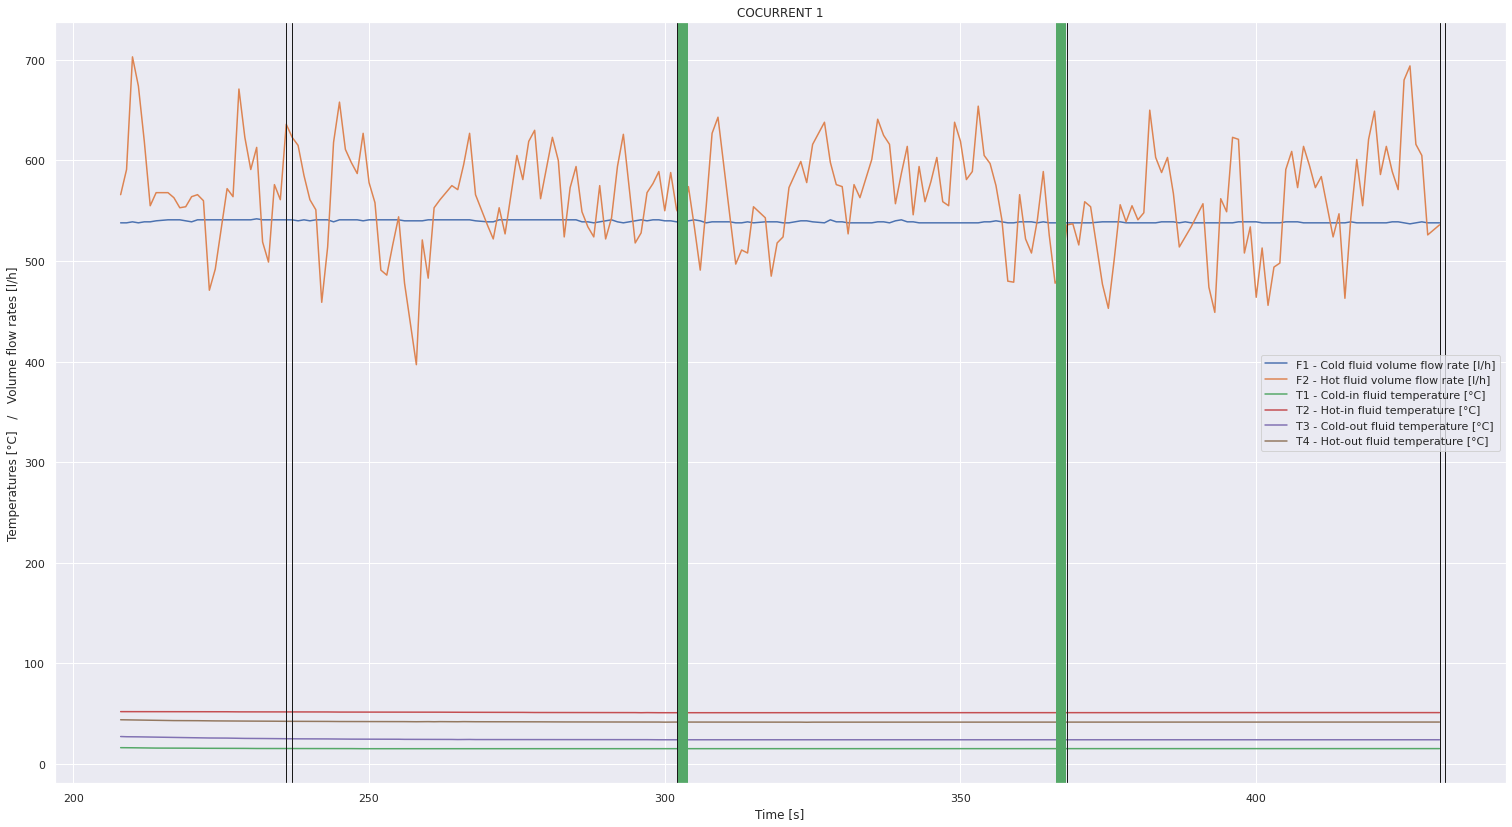

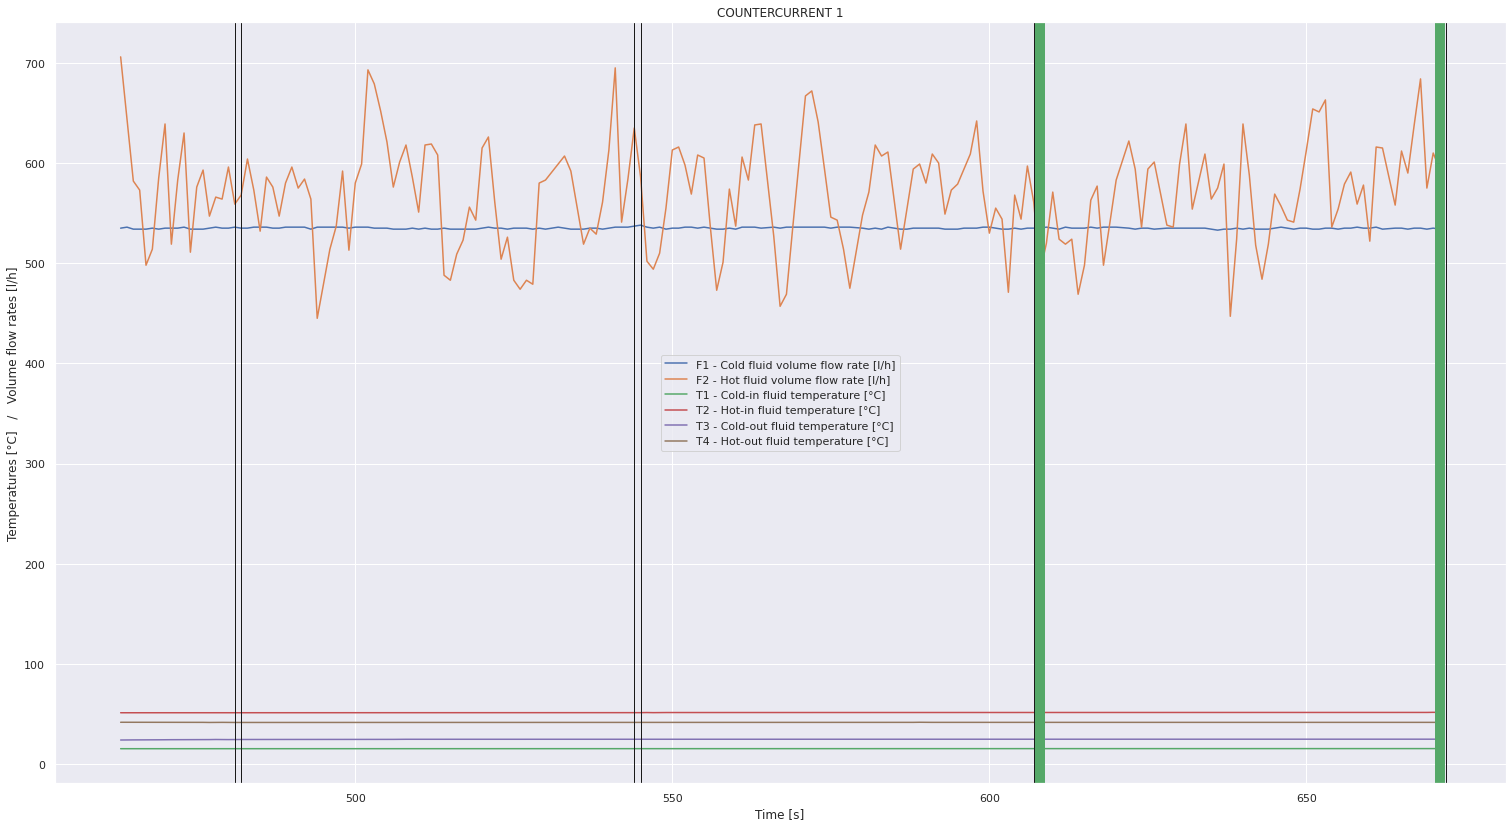

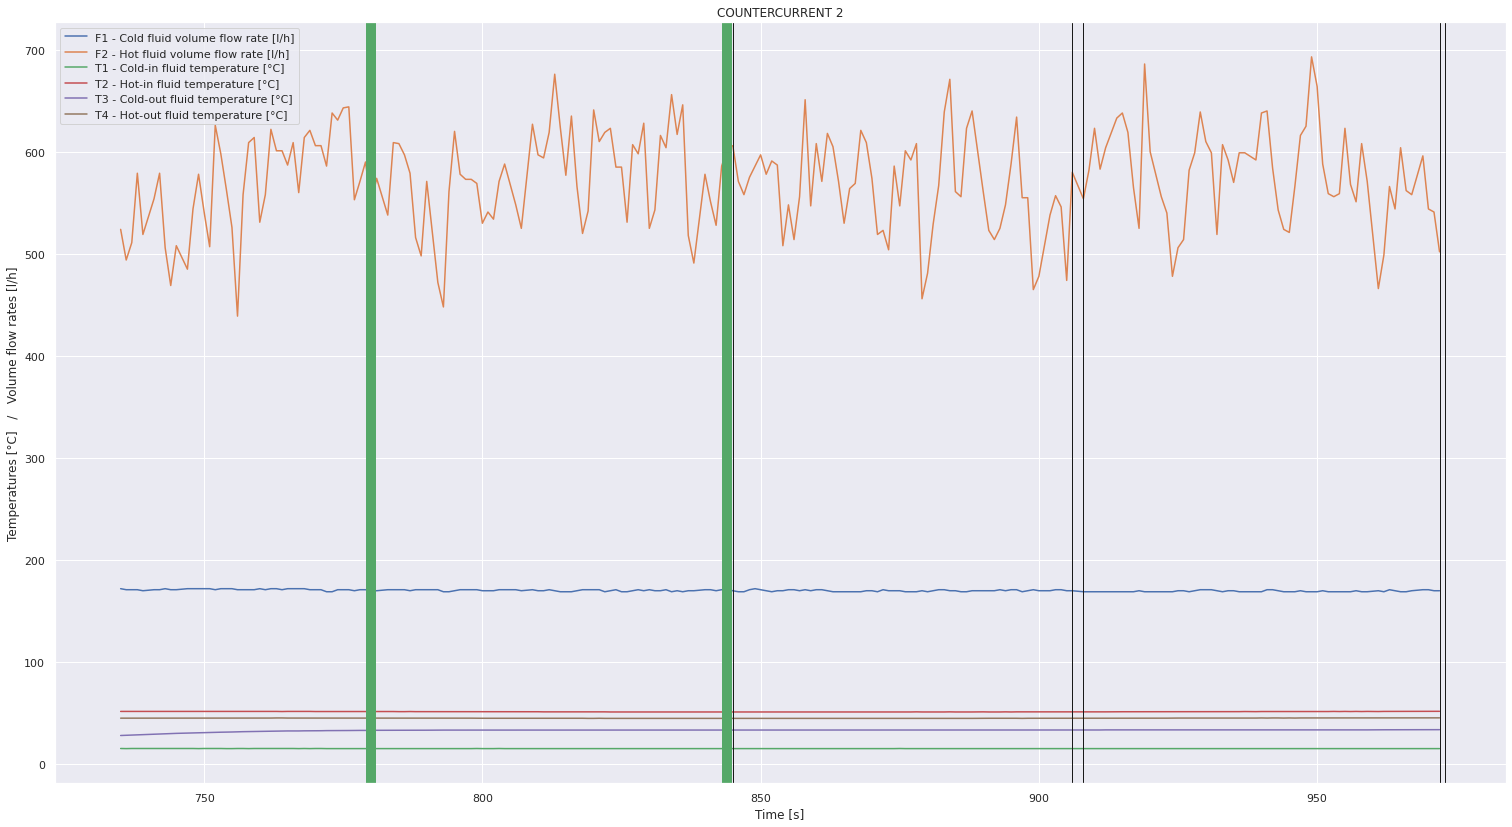

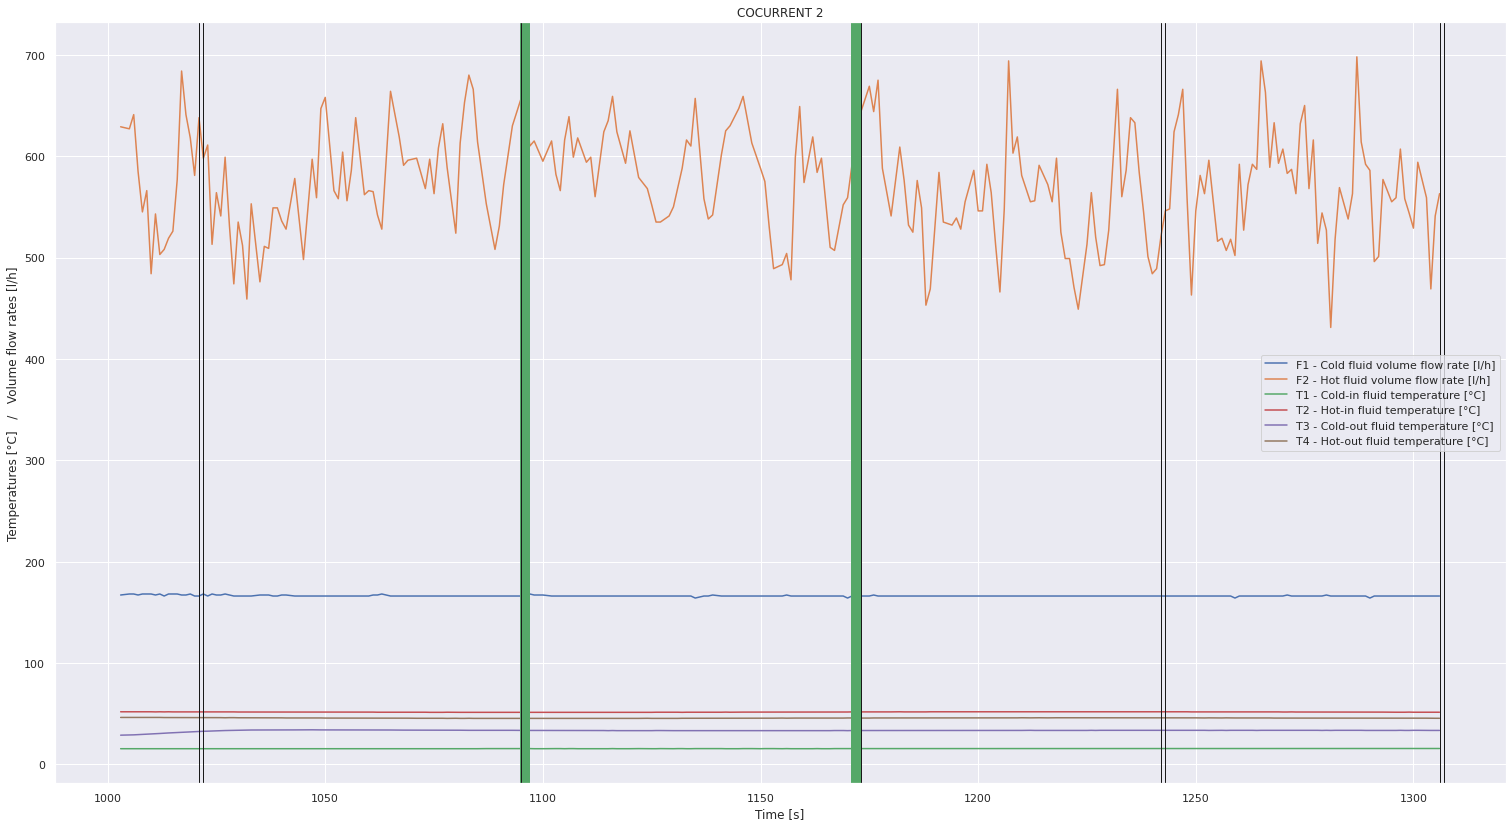

<Figure size 1872x1008 with 0 Axes>

In [1925]:
sc_dbg_flg = False                                                                                      # Steady conditions debug flag (set to True in order to consult functions output)
sc_db_span = 60                                                                                         # Steady conditions datablocks span (in samples)

sc_win_cocurr1 = find_stdy_cond(he_data_cocurr1, sc_db_span, sc_dbg_flg, "COCURRENT 1")                 # Function call to find optimal steady conditions data window for cocurrent measure 1
sc_win_countercurr1 = find_stdy_cond(he_data_countercurr1, sc_db_span, sc_dbg_flg, "COUNTERCURRENT 1")  # Function call to find optimal steady conditions data window for countercurrent measure 1
sc_win_countercurr2 = find_stdy_cond(he_data_countercurr2, sc_db_span, sc_dbg_flg, "COUNTERCURRENT 2")  # Function call to find optimal steady conditions data window for countercurrent measure 2
sc_win_cocurr2 = find_stdy_cond(he_data_cocurr2, sc_db_span, sc_dbg_flg, "COCURRENT 2")                 # Function call to find optimal steady conditions data window for cocurrent measure 2